<h1> TRolke </h1>

In [1]:
from __future__ import division
import sys
home_dir=!echo "$HOME"
sys.path.insert(2,home_dir[0]+'/iPyNb/NERSC_Import') 
from pyROOT_import import *
from ROOT import TH2D, TRolke, Long
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # set size of figures"
plt.rcParams.update({'font.size': 20})

Populating the interactive namespace from numpy and matplotlib


<h1> Setup </h1>

In [2]:
tr=TRolke()
BG=np.arange(0,80,1)
sigBG=np.array([0.1,0.2,0.5])
tr.SetCL(0.9)
#setup pointer to critical number
ncrit=Long()

<h1> 90% CL </h1>

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


(0, 10)

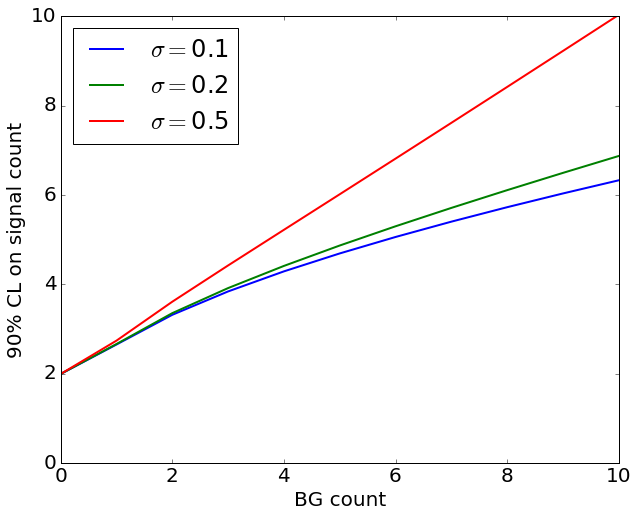

In [3]:
for sig in sigBG:
    Limit=[]
    Limit_BG_ratio=[]
    for bg in BG:
        tr.SetGaussBkgKnownEff(bg,bg,bg*sig,1.0)
        Limit.append(tr.GetUpperLimit())
        Limit_BG_ratio.append(Limit/bg)
    plot(BG,Limit,label=r'$\sigma=$'+str(sig),linewidth=2)
legend(loc='upper left')
xlabel('BG count')
ylabel('90% CL on signal count')
xlim(0,10)
ylim(0,10)

In [4]:
# get normailization to LZ count...
tr.SetGaussBkgKnownEff(6,6,6*0.1,1.0)
tr.GetUpperLimit()

5.058321891104232

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


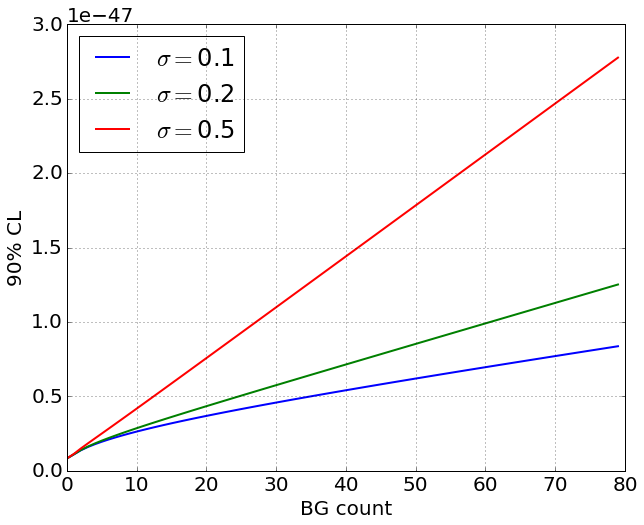

In [5]:
for sig in sigBG:
    Limit=[]
    Limit_BG_ratio=[]
    for bg in BG:
        tr.SetGaussBkgKnownEff(bg,bg,bg*sig,1.0)
        Limit.append(tr.GetUpperLimit())
        Limit_BG_ratio.append(Limit/bg)
    Limit=np.array(Limit)    
    plot(BG,Limit/4.8*2e-48,label=r'$\sigma=$'+str(sig),linewidth=2)
legend(loc='upper left')
xlabel('BG count')
ylabel('90% CL')
grid('on')

<h1> Plot ER signal scale </h1>

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


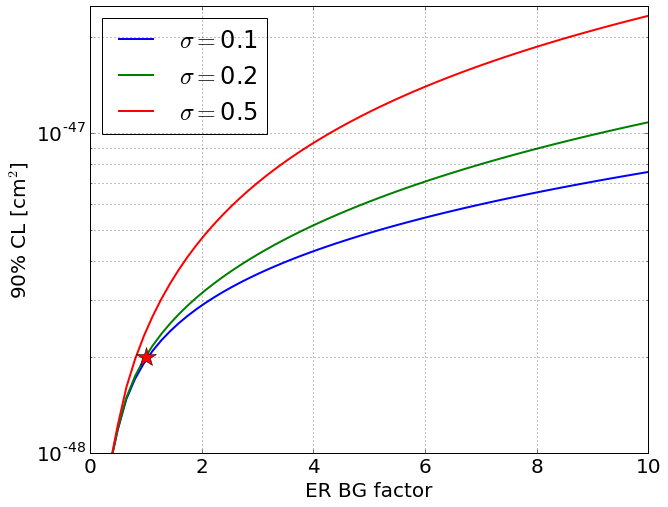

In [93]:
for sig in sigBG:
    Limit=[]
    Limit_BG_ratio=[]
    for bg in BG:
        tr.SetGaussBkgKnownEff(bg,bg,bg*sig,1.0)
        Limit.append(tr.GetUpperLimit())
        Limit_BG_ratio.append(Limit/bg)
    Limit=np.array(Limit)    
    plot((BG-0.4)/6.4+0.4,Limit/4.5*2e-48,label=r'$\sigma=$'+str(sig),linewidth=2)
legend(loc='upper left')
xlabel('ER BG factor')
ylabel('90% CL [cm$^2$]')

#yticks(np.arange(1,10,1)*1e-48)
yticks(np.arange(1,10,1)*1e-48,'hello')

xlim([0,10])
ylim([1e-48,2.5e-47])
yscale('log')

plt.plot([1],[2e-48],'*r',markersize=20)
grid('on')
grid('on',which='minor')

savefig('figs/ER_scaling.png')

<h1> NR background increase factor </h1>

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide


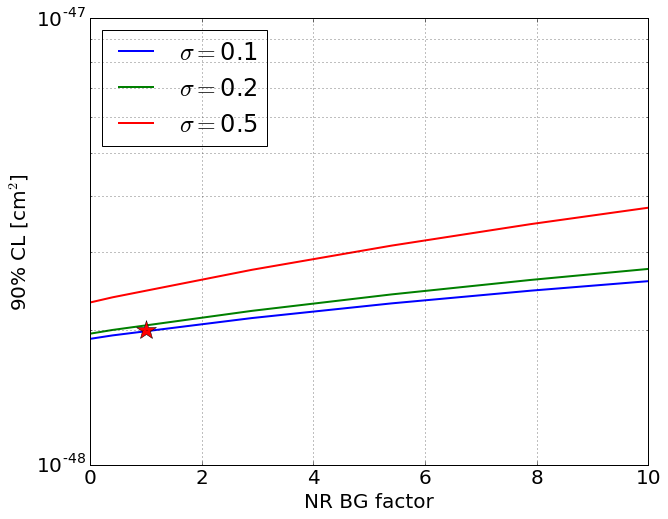

In [95]:
for sig in sigBG:
    Limit=[]
    Limit_BG_ratio=[]
    for bg in BG:
        tr.SetGaussBkgKnownEff(bg,bg,bg*sig,1.0)
        Limit.append(tr.GetUpperLimit())
        Limit_BG_ratio.append(Limit/bg)
    Limit=np.array(Limit)    
    plot((BG-6.4)/0.4+6.4,Limit/4.4*2e-48,label=r'$\sigma=$'+str(sig),linewidth=2)
legend(loc='upper left')
xlabel('NR BG factor')
ylabel('90% CL [cm$^2$]')
xlim([0,10])
ylim([1e-48,1e-47])
yscale('log')
grid('on')
grid('on',which='minor')
plt.plot([1],[2e-48],'*r',markersize=20)
savefig('figs/NR_scaling.png')

<h1> 3 sigma significance </h1>

In [45]:
tr.SetCLSigmas(3.0)
tr.SetGaussBkgKnownEff(BG[ii],BG[ii],BG[ii]*0.2,1.0)
tr.GetCriticalNumber(ncrit);
DP3=ncrit #Total events, signal + BG
DP3_ratio=(DP3-BG[ii])/BG[ii]

ncrit

15